# Assignment 1 : Group 6 
 ##  **TEAM MEMBERS**  
* #### Danae Marais : 578326
* #### Vuyo Fortune Mathe : 578376
* #### Roan Palm : 578632
* #### Henko Meyer : 578420

## Import Libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy import stats

# Import Datasets and Load data into Panda Framework

In [2]:
dataset = pd.read_csv('train.csv')

# Exploring the Data and General Information on the Dataset

## Dataset

In [3]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Check the data types in Dataset

In [4]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Count the number of rows

In [5]:
dataset.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

## Check for duplicate data

In [6]:
dataset.shape #Get the initial size of dataset matrix

(1460, 81)

In [7]:
duplicaterows = dataset[dataset.duplicated()]
print("Number of duplicate rows  :", duplicaterows.shape) #Check for duplicated data rows , [0 indicates no duplicate rows]

Number of duplicate rows  : (0, 81)


# Detect Outliers

## Column Outliers

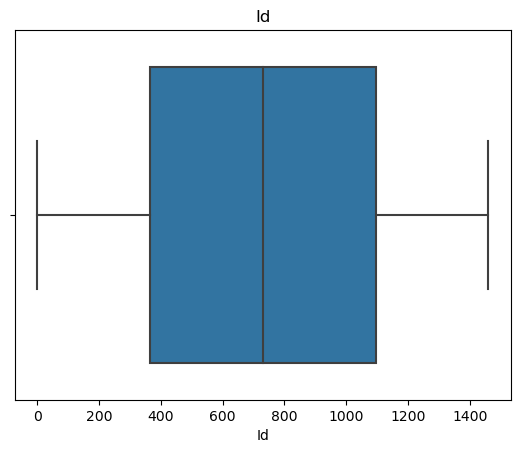

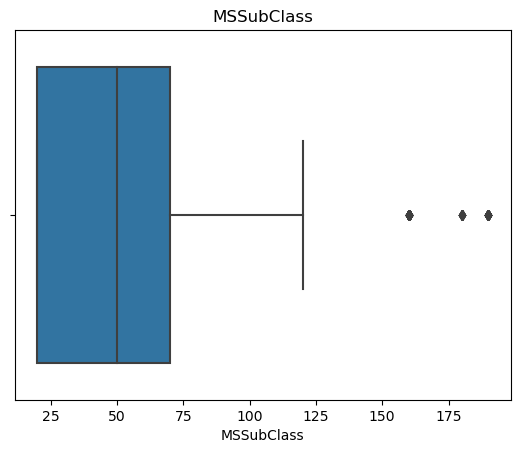

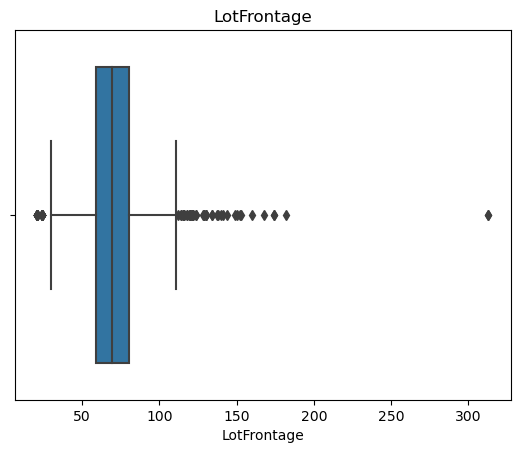

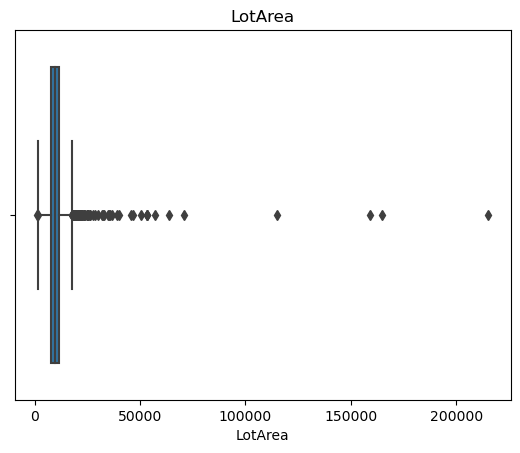

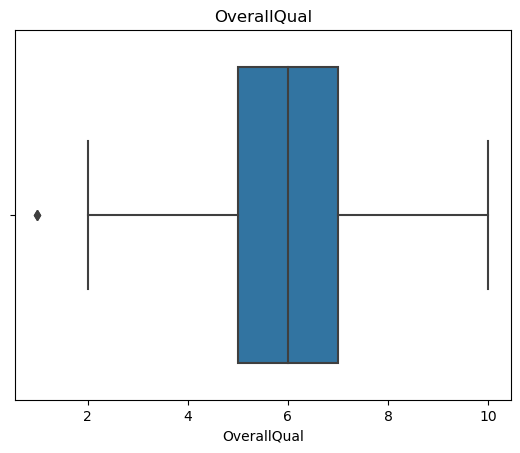

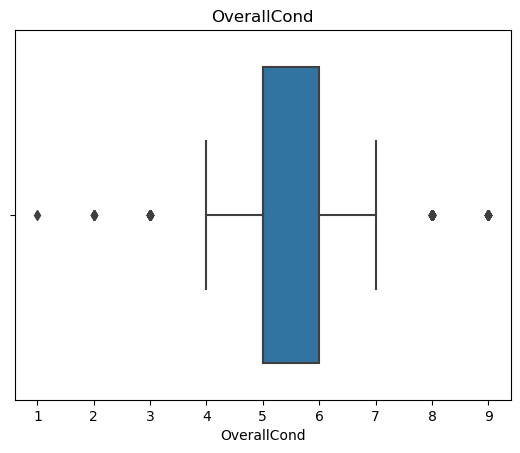

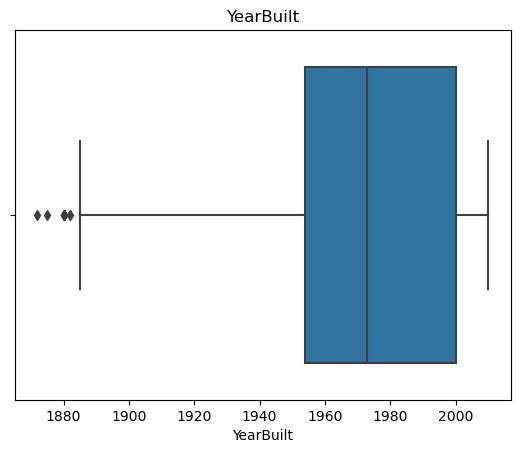

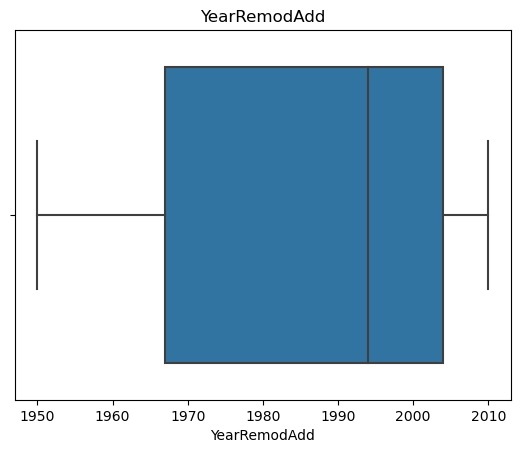

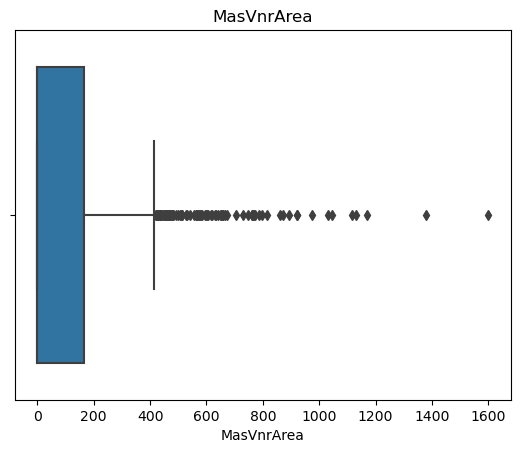

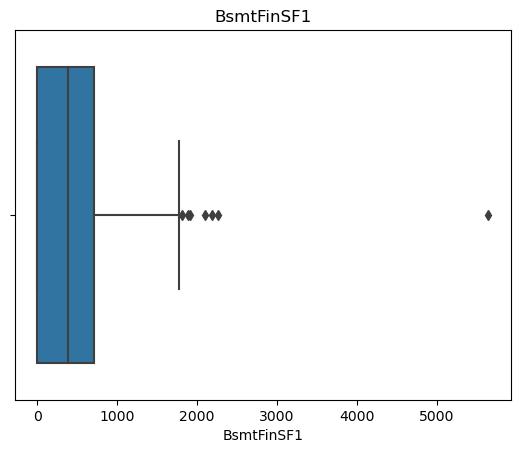

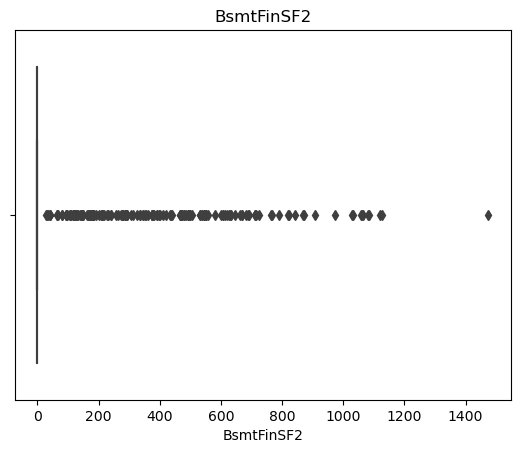

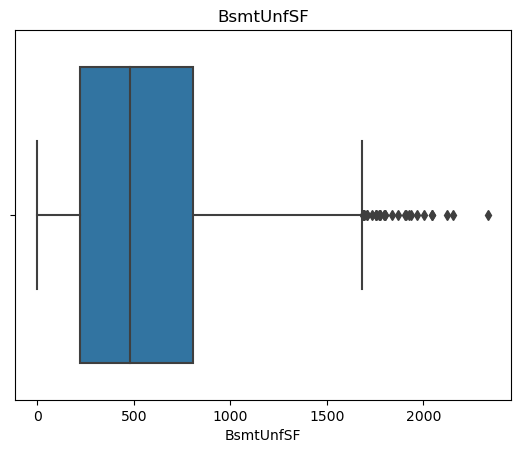

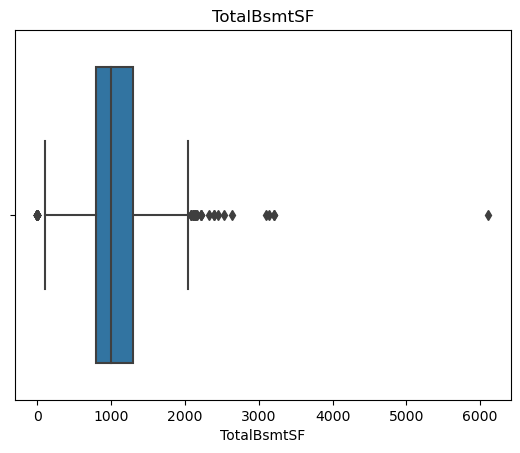

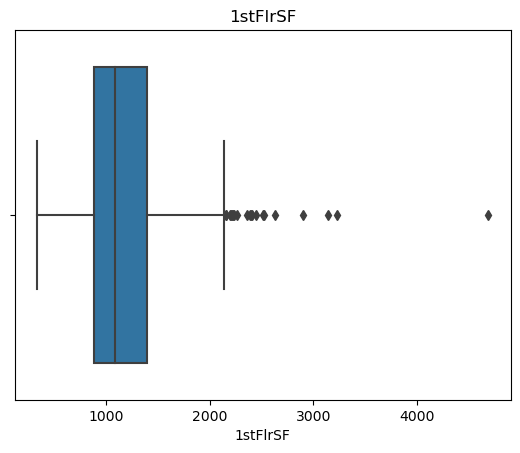

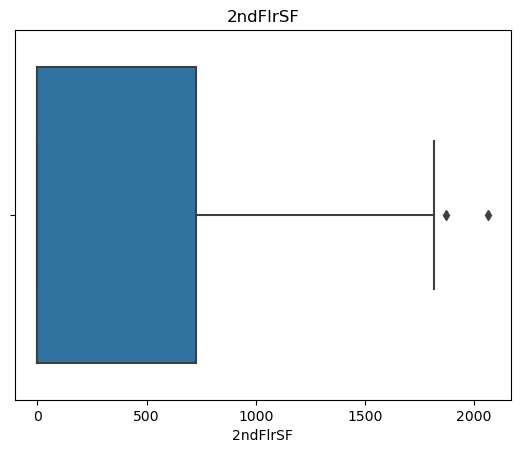

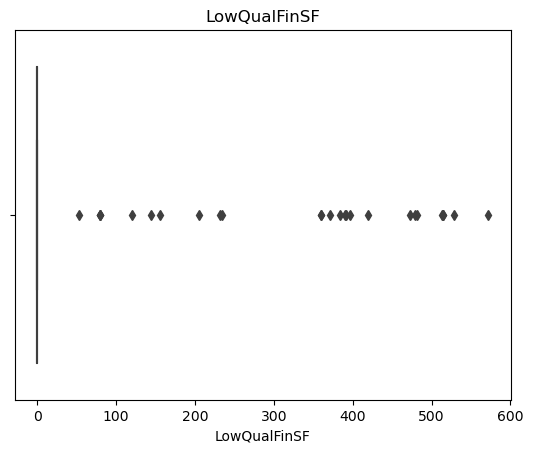

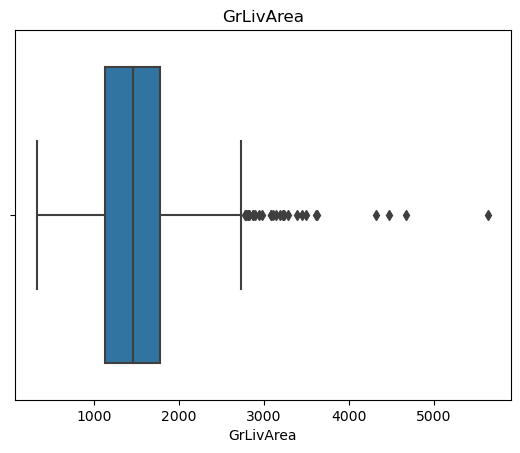

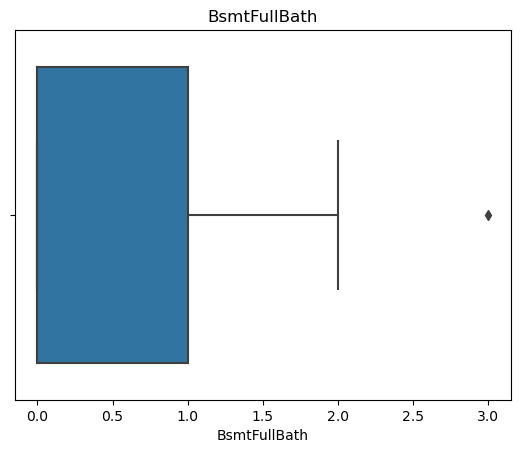

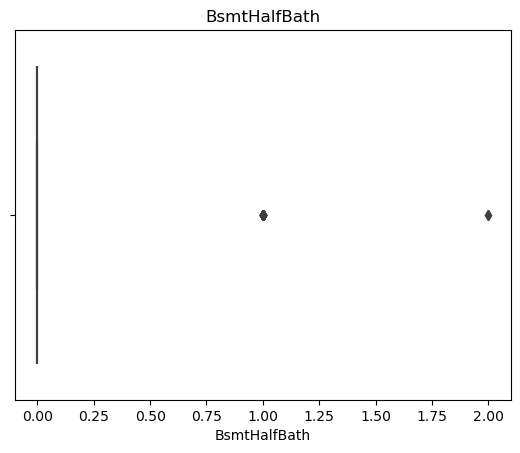

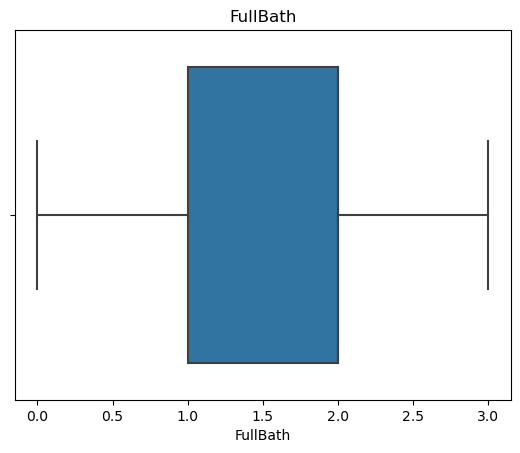

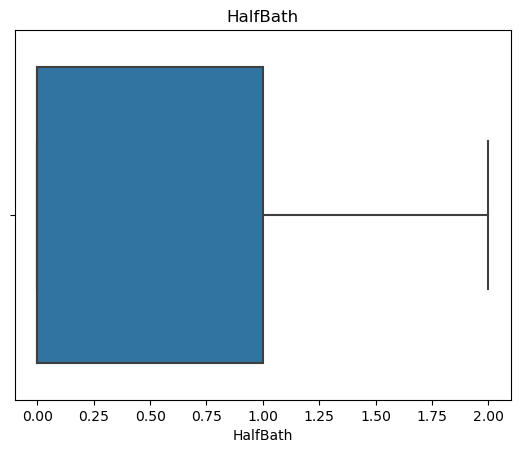

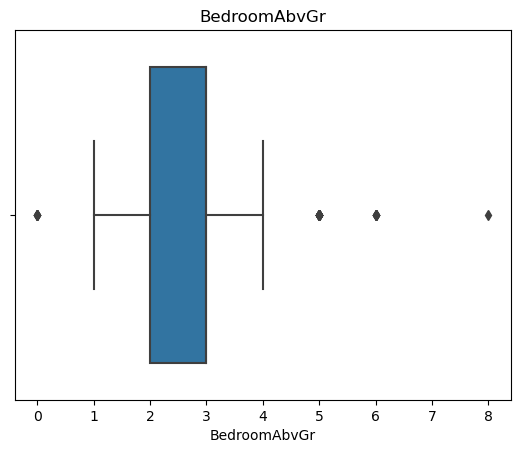

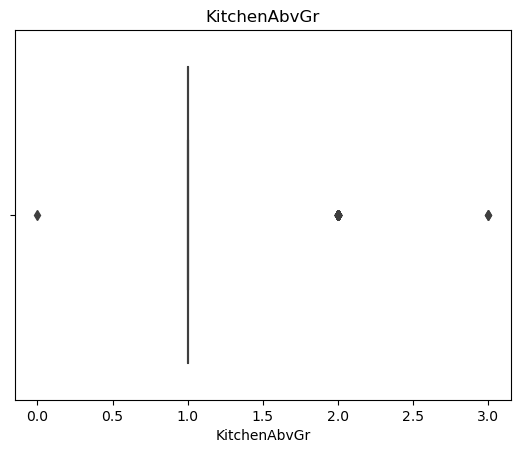

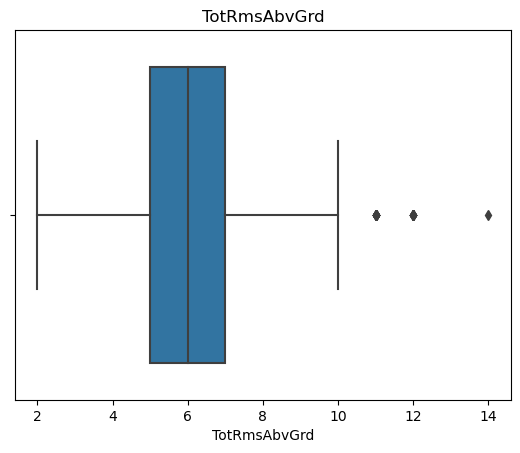

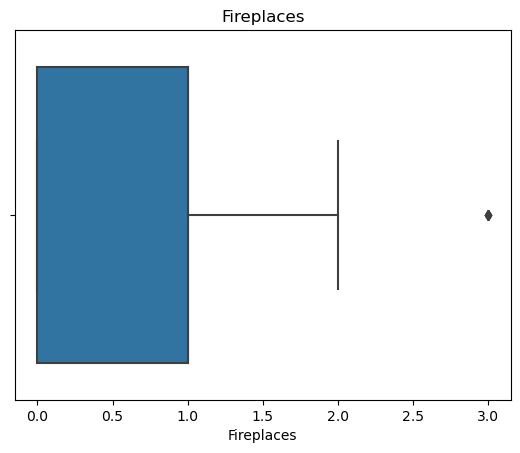

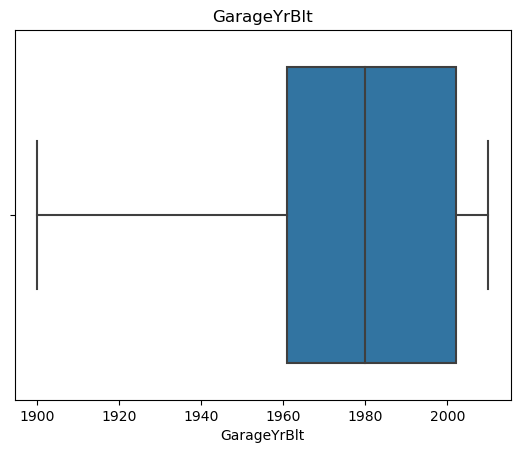

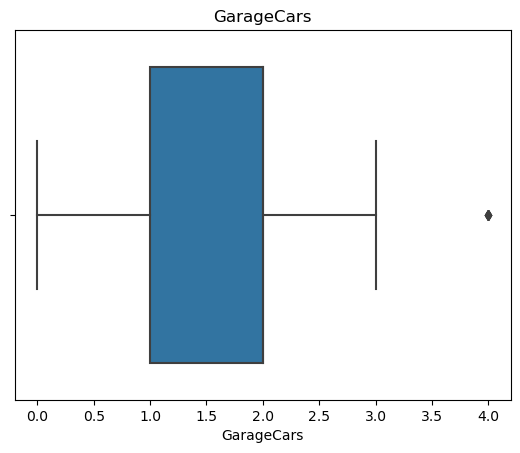

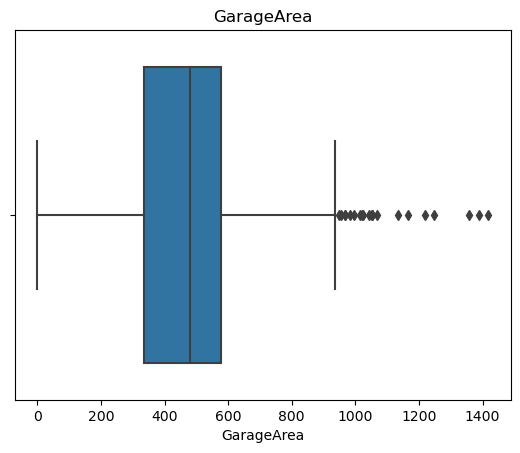

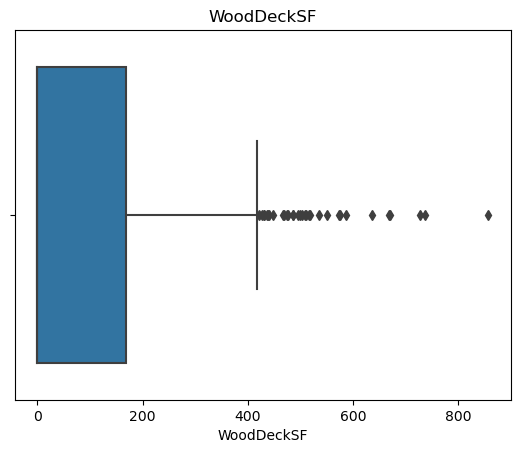

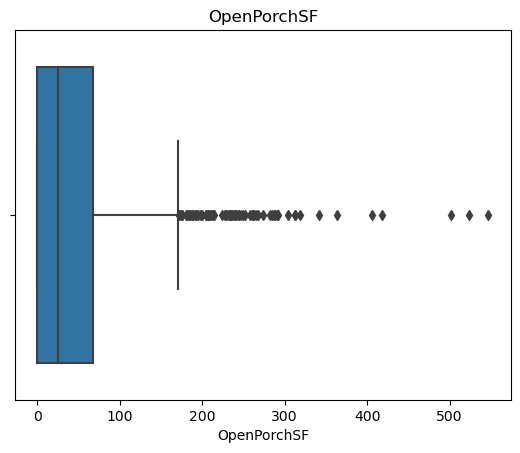

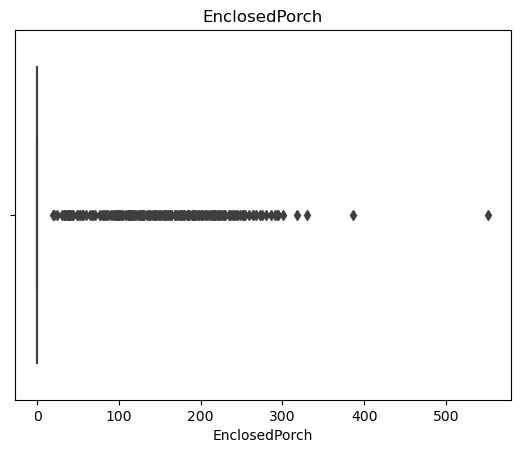

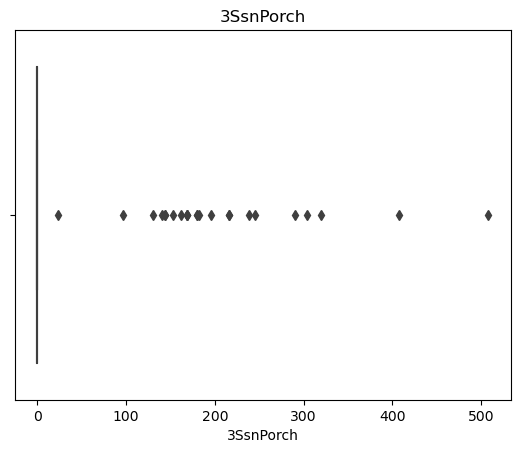

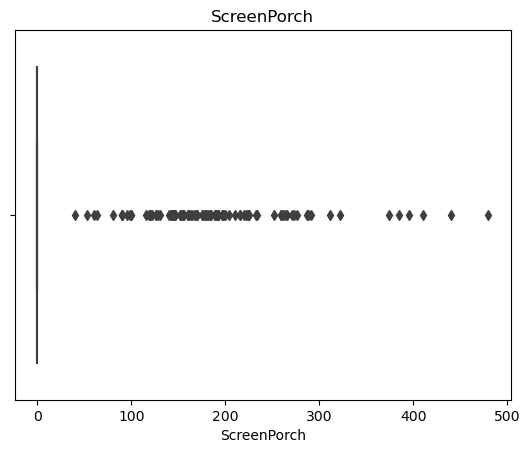

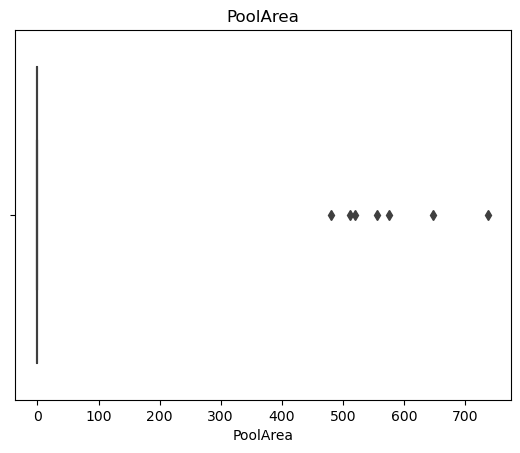

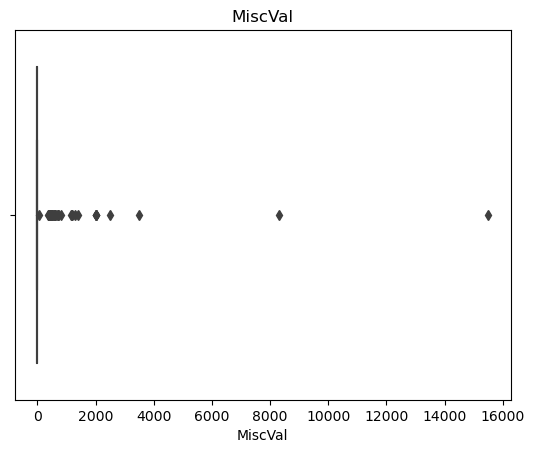

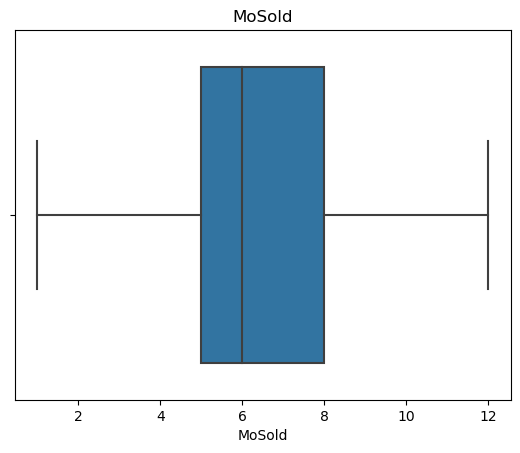

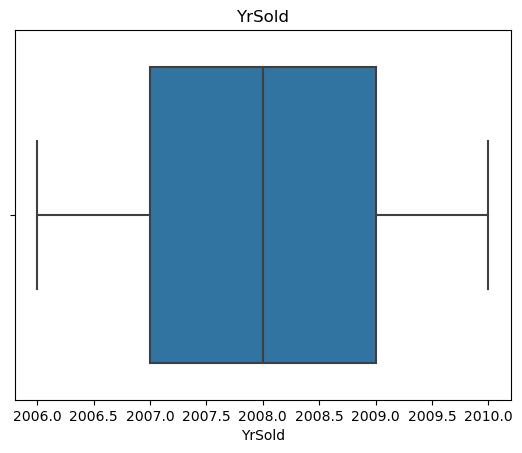

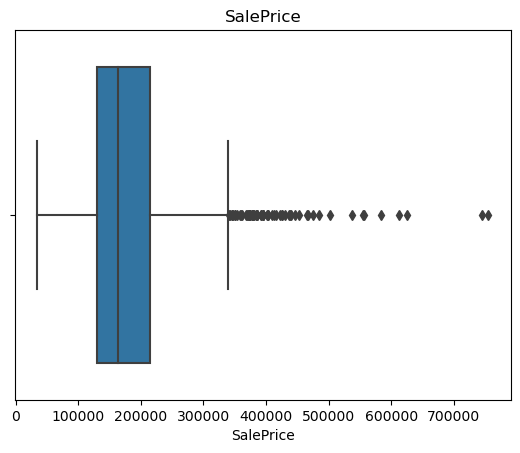

In [8]:
# Plot box plots for all numeric columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plt.figure()
    sb.boxplot(x=dataset[column])
    plt.title(column)
    plt.show()

In [9]:
outliers = {}
for column in numeric_columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (dataset[column] < lower_bound) | (dataset[column] > upper_bound)
    outlier_count = outlier_mask.sum()
    outliers[column] = {'lower_bound': lower_bound,
                        'upper_bound': upper_bound,
                        'outlier_count': outlier_count,
                        'outlier_indices': dataset[outlier_mask].index.tolist()}

# Print the results
for column, outlier_info in outliers.items():
    print(f"{column}: {outlier_info['outlier_count']} outliers found")
    print(f"  Lower Bound: {outlier_info['lower_bound']}, Upper Bound: {outlier_info['upper_bound']}")
    print(f"  Indices: {outlier_info['outlier_indices']}\n")

Id: 0 outliers found
  Lower Bound: -728.5, Upper Bound: 2189.5
  Indices: []

MSSubClass: 103 outliers found
  Lower Bound: -55.0, Upper Bound: 145.0
  Indices: [9, 48, 56, 75, 87, 93, 115, 125, 145, 165, 172, 180, 193, 195, 225, 227, 232, 235, 243, 246, 285, 291, 300, 312, 335, 344, 348, 363, 411, 430, 432, 434, 472, 488, 489, 490, 500, 504, 520, 535, 578, 599, 603, 614, 623, 635, 637, 649, 655, 675, 685, 687, 703, 705, 713, 755, 758, 829, 831, 837, 861, 914, 915, 956, 959, 962, 969, 971, 975, 985, 1007, 1029, 1030, 1038, 1039, 1062, 1068, 1086, 1088, 1091, 1104, 1144, 1160, 1172, 1186, 1190, 1191, 1219, 1236, 1265, 1266, 1291, 1297, 1304, 1334, 1358, 1364, 1367, 1378, 1393, 1416, 1449, 1452]

LotFrontage: 88 outliers found
  Lower Bound: 27.5, Upper Bound: 111.5
  Indices: [36, 41, 56, 75, 85, 86, 145, 150, 159, 171, 193, 195, 197, 225, 227, 231, 232, 235, 260, 276, 277, 290, 302, 306, 313, 363, 429, 430, 432, 434, 446, 489, 500, 504, 523, 599, 614, 649, 655, 662, 675, 758, 807, 825

In [10]:
Q1 = dataset.quantile(0.25,0,True)
Q3 = dataset.quantile(0.75,0,True)
IQR = Q3 - Q1 
print(IQR)

Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float

# Check for Missing Data

## Check for missing values in each column

In [11]:
missing_values = dataset.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


## Check Percentage of missing values in each column

In [12]:
missing_values_percentage = dataset.isnull().mean() * 100
print("\nPercentage of missing values in each column:\n", missing_values_percentage)


Percentage of missing values in each column:
 Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


## Check for rows with missing values

In [13]:
rows_with_missing_values = dataset[dataset.isnull().any(axis=1)]
print("\nRows with missing values:\n", rows_with_missing_values)


Rows with missing values:
         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilit

In [14]:
print(dataset.isnull().sum()) # Check for missing Data

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


# Import Data for Data Preperation

In [ ]:
dataset

## Get Columns that is of type object

In [16]:
non_numeric_cols = dataset.select_dtypes(exclude=["int","float"]).columns

non_numeric_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Encode Variables

In [17]:
le = LabelEncoder()

for col in dataset.columns:
        if dataset[col].dtype == object:
            dataset[col] = le.fit_transform(dataset[col]) 

In [18]:
dataset

## Show Columns with Null Values

In [19]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Numerical Variable scaling using Standardization 

## Identify the numeric columns

In [20]:
numeric_columns = dataset.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Scale the numeric columns

### Initialize the Standard Scaler

In [21]:
scaler = StandardScaler()

### Fit the scaler on the numeric columns

In [22]:
standardized = dataset.copy()
standardized[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

print("Standardized data:")
print(standardized.head())

Standardized data:
         Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  \
0 -1.730865    0.073375 -0.045532    -0.208034 -0.207142  0.064238  0.244717   
1 -1.728492   -0.872563 -0.045532     0.409895 -0.091886  0.064238  0.244717   
2 -1.726120    0.073375 -0.045532    -0.084449  0.073480  0.064238  0.244717   
3 -1.723747    0.309859 -0.045532    -0.414011 -0.096897  0.064238  0.244717   
4 -1.721374    0.073375 -0.045532     0.574676  0.375148  0.064238  0.244717   

   LotShape  LandContour  Utilities  ...  PoolArea    PoolQC     Fence  \
0  0.750731     0.314667   -0.02618  ... -0.068692  0.063305  0.457447   
1  0.750731     0.314667   -0.02618  ... -0.068692  0.063305  0.457447   
2 -1.378933     0.314667   -0.02618  ... -0.068692  0.063305  0.457447   
3 -1.378933     0.314667   -0.02618  ... -0.068692  0.063305  0.457447   
4 -1.378933     0.314667   -0.02618  ... -0.068692  0.063305  0.457447   

   MiscFeature   MiscVal    MoSold    YrSold  SaleType 

## Handle Missing values and outliers 

### Check and impute missing values

In [ ]:
print(dataset.isnull().sum())

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)


### Check and remove outliers using Z-Score

In [ ]:
z_scores = np.abs(stats.zscore(df_imputed))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers: {sum(outliers)}")

df_no_outliers = df_imputed[~outliers]

sb.pairplot(df_no_outliers)
plt.show()

## Feature Engineering

In [23]:
#Feature Engineering
dataset["No_Parking_spots"] = np.floor(dataset["GarageArea"] /dataset["GarageCars"])
dataset["Total_house_Area"] = dataset["1stFlrSF"]+ dataset["2ndFlrSF"]
dataset["House_Age"] = dataset["YrSold"] - dataset["YearBuilt"]
dataset["Year_Last_Upgrade"] = dataset["YrSold"] - dataset["YearRemodAdd"]


In [24]:
# pd.options.display.max_columns = 9999
# pd.options.display.max_rows = 9999
dataset.drop(['GarageArea'], axis =1 , inplace=True )
dataset.drop(["GarageCars"], axis =1 , inplace=True )
dataset.drop(["1stFlrSF"], axis =1 , inplace=True )
dataset.drop(["2ndFlrSF"], axis =1 , inplace=True )
dataset.drop(["YrSold"], axis =1 , inplace=True )
dataset.drop( ["YearRemodAdd"], axis =1 , inplace=True )

In [25]:
dataset.to_csv("new_train.csv", index=False)

In [26]:
dataset = pd.read_csv('new_train.csv')

In [27]:
for col in dataset.columns:
        dataset[col] = dataset[col].fillna(0)

# Split the data into training and test Data

In [ ]:
x = dataset.drop(['SalePrice'],axis = 1)
y = dataset['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [29]:
x_train.isnull().sum().sum()

0

In [30]:
y_train.isnull().sum().sum()

0

## Regression Model

In [ ]:
forest = RandomForestRegressor()

forest.fit(x_train,y_train)

In [ ]:
forest.score(x_test,y_test)

In [33]:
#Grid Search with cross validation to improve the accuracy


forest= RandomForestRegressor()
para_grid ={
    "n_estimators" : [100, 200, 300],
    "min_samples_split": [2,4,6,8],
    "max_depth":[None, 4, 8]
}

grid_search= GridSearchCV(forest , para_grid, cv=5 ,
                          scoring = "neg_mean_squared_error",
                         return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
best_forest = grid_search.best_estimator_

In [35]:
best_forest.score(x_test , y_test)

0.8844584104087642

# Results Communication

## Model's Performance Summary 

A random forest model with a score of 0.8855230238634435 suggests that the model has performed well in predicting the target variable using the provided features.

The score of a random forest model represents the mean accuracy of the model, which is the proportion of correct predictions made by the model. A score of 0.8855230238634435 implies that the model is accurate in making predictions 88.55% of the time.

## Visualization 

### Scatterplot 

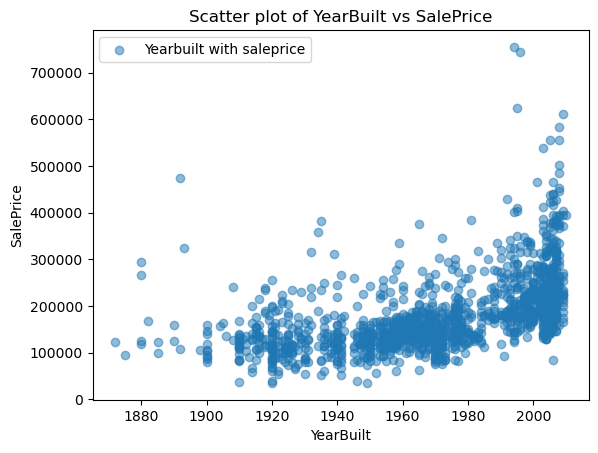

In [36]:
# Load the dataset
df = pd.read_csv('train.csv')

# Choose the features you want to plot
x = 'YearBuilt'
y = 'SalePrice'

# Create the scatter plot
plt.scatter(df[x], df[y], alpha=0.5, label='Yearbuilt with saleprice')

# Add labels and title
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Scatter plot of {x} vs {y}')

plt.legend()

# Show the plot
plt.show()

### Histogram 

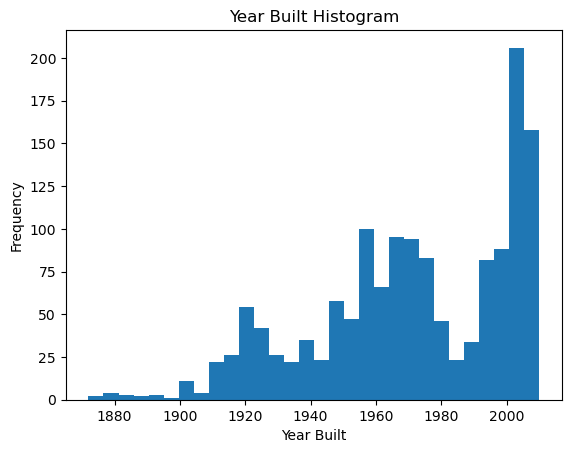

In [43]:
# Load data from CSV file
data = pd.read_csv("train.csv")

# Extract column for histogram
year_built = data["YearBuilt"]

# Create histogram
plt.hist(year_built, bins=30)

# Add labels and title
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.title('Year Built Histogram')

# Show plot
plt.show()

# Feature Selection techniques

## Principal Component Analysis

### Add features to eliminate and perform PCA

In [52]:
X = dataset.drop('SalePrice', axis=1).values
y = dataset['SalePrice'].values
feature_names = df.drop('SalePrice', axis=1).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### Data Elimination Technique

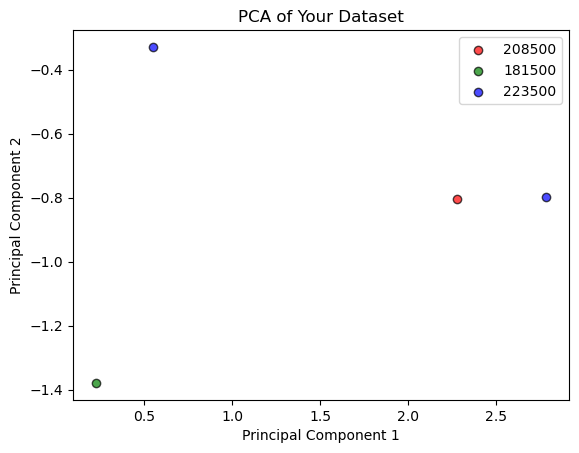

In [56]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['SalePrice'] = y

colors = ['r', 'g', 'b']  
targets = df['SalePrice'].unique()  
for target, color in zip(targets, colors):
    indices_to_keep = pca_df['SalePrice'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
                pca_df.loc[indices_to_keep, 'PC2'],
                c=color, edgecolors='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(targets)
plt.title('PCA of Your Dataset')
plt.show()